# Assignment 5

## Web scraping

Use requests and BeautifulSoup to make a list of all the CORGIS datasets.
- Use requests with the following site: "https://corgis-edu.github.io/corgis/csv/"
- The relevant HTML tag to search for is "h3"

In [1]:
import requests

In [49]:
response = requests.get('https://corgis-edu.github.io/corgis/csv/')
response

<Response [200]>

In [40]:
response.text

'<!DOCTYPE html>\n<html lang="en-US">\n    <head>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n    <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">\n\n    \n    \n\n    <title>CORGIS Datasets Project</title>\n    <meta name="description" content="\n\n\n\n\n\n\n            Github Pages for CORGIS Datasets Project">\n    <link rel="canonical" href="https://corgis-edu.github.io//corgis/csv/">\n\n    <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/css/bootstrap.min.css">\n    <link rel="stylesheet" href="https://code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">\n    <link rel="stylesheet" href="/corgis/assets/css/main.css">\n\n    \n\n    \n\n    <script src="/corgis/assets/js/jquery-3.3.1.min.js"></script>\n    <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.min.js"\n            integrity="sha256-VazP97ZCwtekAsvgPBSUwPFKdrwD3unUfSGVYrahUqU="\n            crossorigi

In [41]:
print(response.text)

<!DOCTYPE html>
<html lang="en-US">
    <head>
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">

    
    

    <title>CORGIS Datasets Project</title>
    <meta name="description" content="






            Github Pages for CORGIS Datasets Project">
    <link rel="canonical" href="https://corgis-edu.github.io//corgis/csv/">

    <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/css/bootstrap.min.css">
    <link rel="stylesheet" href="https://code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">
    <link rel="stylesheet" href="/corgis/assets/css/main.css">

    

    

    <script src="/corgis/assets/js/jquery-3.3.1.min.js"></script>
    <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.min.js"
            integrity="sha256-VazP97ZCwtekAsvgPBSUwPFKdrwD3unUfSGVYrahUqU="
            crossorigin="anonymous"></script>

    <scr

In [8]:
from bs4 import BeautifulSoup

In [52]:
# Save all the html in a string variable
html_string = response.text

# Use BeautifulSoup to create a new object that will allow you to search for HTML tags
document = BeautifulSoup(html_string, "html.parser")

# This "document" variable is an object that has a "find" method
document.find_all('h3')
corgis = document.find_all('h3')
for corgis in h3:
    print (corgis.string)

Aids
Airlines
Billionaires
Broadway
Business Dynamics
Cancer
Cars
Classics
Construction Permits
Construction Spending
County Demographics
Covid
Drugs
Earthquakes
Election
Electricity
Emissions
Energy
Finance
Food
Food Access
Global Development
Graduates
Health
Hospitals
Hydropower
Ingredients
Injuries
Labor
Medal Of Honor
Music
Opioids
Police Shootings
Publishers
Real Estate
Retail Services
School Scores
Skyscrapers
Slavery
State Crime
State Demographics
State Fragility
Suicide Attacks
Supreme Court
Tate
Video Games
Weather
Wind Turbines


Write a function that takes an element from the list of CORGIS datasets, searches the respective CORGIS page for the CSV download link, and returns a Pandas dataframe.

- If I hypothetically defined a function with:
    - def pdcorgis(a):
- and wanted to call this pdcorgis function with Python code like:
    - df = pdcorgis("Classics")
- then an example flow of python commands inside the function could be:
    - Convert "Classics" to lowercase (using the lower() method)
    - Use requests with "https://corgis-edu.github.io/corgis/csv/" plus "classics" plus "/" to get the website's HTML
    - Use BeautifulSoup to search for all the HTML link elements on that page (links have the tag "a")
    - For any link element "i", check if i.has_attr('download') is true, and then get part of the download link for the csv file via i['href']
    - The complete download link for the file will be "https://corgis-edu.github.io/corgis/csv/" plus "classics" plus "/" plus the result you found for i['href']
    - Use return corgisdf at the end of your function, where corgisdf is assigned to be the value returned by pd.read_csv() with the download link you have found

In [74]:
def pdcorgis(element):
    element = element.lower()
    url = "https://corgis-edu.github.io/corgis/csv/" + element + "/"
    response = requests.get(url)
    html_string = response.text
    document = BeautifulSoup(html_string, "html.parser")
    corgis = document.find_all('a')
    for i in corgis:
        if i.has_attr('download'):
            corgisdf = pd.read_csv(url + i.attrs['href'])
            return corgisdf

In [75]:
#testing the function
pdcorgis("Classics")

,bibliography.congress classifications,bibliography.languages,bibliography.subjects,bibliography.title,bibliography.type,metadata.downloads,metadata.id,metadata.rank,metadata.url,bibliography.author.birth,...,metrics.sentiments.polarity,metrics.sentiments.subjectivity,metrics.statistics.average letter per word,metrics.statistics.average sentence length,metrics.statistics.average sentence per word,metrics.statistics.characters,metrics.statistics.polysyllables,metrics.statistics.sentences,metrics.statistics.syllables,metrics.statistics.words
0,PR,en,"Sisters -- Fiction,Courtship -- Fiction,Social...",Pride and Prejudice,Text,36576,1342,1,https://www.gutenberg.org/ebooks/1342,1775,...,0.136713,0.522239,4.83,18.0,0.05,586794,4603,6511,170648.1,121533
1,PS,en,"Mentally ill women -- Fiction,Feminist fiction...",The Yellow Wallpaper,Text,26363,1952,2,https://www.gutenberg.org/ebooks/1952,1860,...,0.054174,0.534787,4.41,15.0,0.06,26769,102,385,7686.9,6067
2,"PZ,PR",en,Fantasy,Alice's Adventures in Wonderland,Text,18882,11,3,https://www.gutenberg.org/ebooks/11,1832,...,0.041079,0.497276,4.65,17.0,0.06,122719,339,1501,33810.3,26389
3,PR,en,Monsters -- Fiction;Frankenstein's monster (Fi...,"Frankenstein; Or, The Modern Prometheus",Text,17128,84,4,https://www.gutenberg.org/ebooks/84,1797,...,0.100902,0.539516,4.77,23.0,0.04,357604,2604,3239,106802.1,74959
4,PT,en,"Psychological fiction,Metamorphosis -- Fiction",Metamorphosis,Text,15683,5200,5,https://www.gutenberg.org/ebooks/5200,1883,...,0.041997,0.479019,4.56,27.0,0.04,100372,397,800,28752.3,22022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,NaN,en,NaN,The Reluctant Heroes,Text,0,51483,1002,https://www.gutenberg.org/ebooks/51483,1926,...,0.076203,0.451757,4.68,11.0,0.09,32354,112,618,8824.5,6913
1002,NaN,en,NaN,"Film Truth; September, 1920",Text,0,51484,1003,https://www.gutenberg.org/ebooks/51484,0,...,0.143879,0.485782,5.02,17.0,0.06,45970,312,536,13080.6,9153
1003,NaN,en,NaN,Othmar,Text,0,51487,1004,https://www.gutenberg.org/ebooks/51487,1839,...,0.099478,0.548289,4.66,21.0,0.05,890918,4808,8921,258091.2,191182
1004,NaN,en,NaN,Church History (Volumes 1-3),Text,0,51491,1005,https://www.gutenberg.org/ebooks/51491,1809,...,0.112242,0.440014,5.31,17.0,0.06,3883244,46730,41950,1083170.7,730715


Using dataframes returned by your new function, make a line plot, a bar plot, and a histogram plot

- Each plot should be of a different CORGIS dataset
    - 3 plots total (not 3 plots for each dataset)
    - Note that when you make these plots, there should not be any data files in your notebook's directory.
- You may find it useful to use df.head() to get a quick idea of what's in each dataframe.
- Remember that bar plots have categorical data on the horizontal axis, and depending on your data, you may want to subset your data before making the bar plot.

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Mean Salaries for Economics Major Graduates'}, xlabel='Year'>

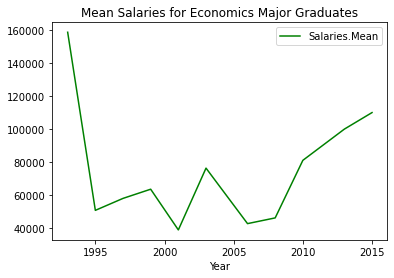

In [109]:
#line plot
graduates = pdcorgis("Graduates")
graduates.head()
graduates_economics = graduates[graduates["Education.Major"] == "Economics"]
graduates_economics.plot(kind='line', x="Year", y="Salaries.Mean", color = "green", title = 'Mean Salaries for Economics Major Graduates')

<AxesSubplot:title={'center':'Total Sugar for Different Kinds of Pie'}, ylabel='Description'>

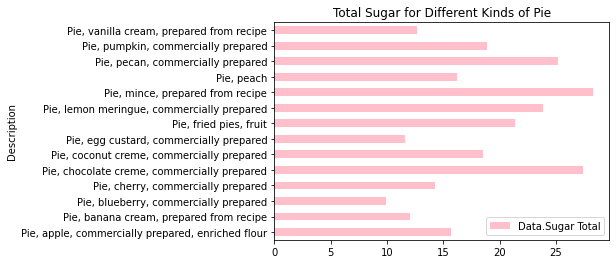

In [108]:
#bar plot
ingredients = pdcorgis("Ingredients")
ingredients.head()
ingredients_pie = ingredients[ingredients["Category"] == "Pie"]
ingredients_pie.plot(kind='barh', x="Description", y="Data.Sugar Total", color = "pink", title = 'Total Sugar for Different Kinds of Pie')

<AxesSubplot:title={'center':'Distribution of Theatre Capacity Across Beauty and the Beast Performances'}, ylabel='Frequency'>

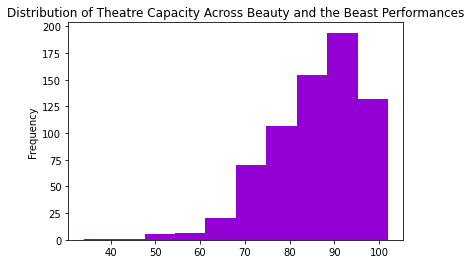

In [150]:
#histogram plot
publishers = pdcorgis("Publishers")
publishers.head()
beauty_and_the_beast = broadway[broadway["Show.Name"] == "Beauty And The Beast"]
beauty_and_the_beast["Statistics.Capacity"].plot.hist(bins = 10, color = "darkviolet", title = 'Distribution of Theatre Capacity Across Beauty and the Beast Performances')